In [1]:
# Installation and imports of necessary python packages or modules

# !pip install pandas
# !pip install seaborn
# !pip install statsmodels
# !pip install openpyxl
# !pip install xgboost
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from imblearn.over_sampling import SMOTE
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, roc_curve)
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pickle

In [2]:
# Loading the main dataset and the data dictionary from an Excel file

df  = pd.read_excel('/Users/arjunkhatiwada/Documents/master_project_code/mp_cp_ak/e_commerce_dataset.xlsx',sheet_name='E Comm')
data_disc = pd.read_excel('/Users/arjunkhatiwada/Documents/master_project_code/mp_cp_ak/e_commerce_dataset.xlsx',sheet_name='Data Dict')
df_eda = df.copy()

In [3]:
# Preview of Data Dictionary with brief description

pd.set_option('display.max_colwidth', 100)
data_disc.columns = data_disc.iloc[0]
data_disc = data_disc[2:]
data_disc.reset_index(drop=True, inplace=True)
data_disc.rename(columns={'Discerption': 'Description'}, inplace=True)
data_disc.iloc[:,1:]

,Data,Variable,Description
0,E Comm,Churn,Churn Flag
1,E Comm,Tenure,Tenure of customer in organization
2,E Comm,PreferredLoginDevice,Preferred login device of customer
3,E Comm,CityTier,City tier
4,E Comm,WarehouseToHome,Distance in between warehouse to home of customer
5,E Comm,PreferredPaymentMode,Preferred payment method of customer
6,E Comm,Gender,Gender of customer
7,E Comm,HourSpendOnApp,Number of hours spend on mobile application or website
8,E Comm,NumberOfDeviceRegistered,Total number of deceives is registered on particular customer
9,E Comm,PreferedOrderCat,Preferred order category of customer in last month


In [4]:
# printing the first five rows
df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


In [5]:
# Cheking the data in the column WarehouseToHome. In the data Description, unit is not mentioned so we consider it to be in kilometers(KM)
df['WarehouseToHome'].unique()

array([  6.,   8.,  30.,  15.,  12.,  22.,  11.,   9.,  31.,  18.,  13.,
        20.,  29.,  28.,  26.,  14.,  nan,  10.,  27.,  17.,  23.,  33.,
        19.,  35.,  24.,  16.,  25.,  32.,  34.,   5.,  21., 126.,   7.,
        36., 127.])

In [6]:
# Cheking the data in the column Tenure. In the data Description, unit is not mentioned so we consider it to be in months
df['Tenure'].unique()

array([ 4., nan,  0., 13., 11.,  9., 19., 20., 14.,  8., 18.,  5.,  2.,
       30.,  1., 23.,  3., 29.,  6., 26., 28.,  7., 24., 25., 10., 15.,
       22., 27., 16., 12., 21., 17., 50., 60., 31., 51., 61.])

In [7]:
# Overview of the dataset's structure and contents
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

Dataset contains 5630 entries and 20 columns with various data types: int64 for integers, float64 for decimal values, and object for categorical variables. Most columns have 5630 non-null entries, showing that they are complete, though a few columns like Tenure and OrderCount have missing values.

In [8]:
# Checking descriptive statistics of dataset
df.describe()

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,5630.000000,5630.000000,5366.000000,5630.000000,5379.000000,5375.000000,5630.000000,5630.000000,5630.000000,5630.000000,5365.000000,5374.000000,5372.000000,5323.000000,5630.000000
mean,52815.500000,0.168384,10.189899,1.654707,15.639896,2.931535,3.688988,3.066785,4.214032,0.284902,15.707922,1.751023,3.008004,4.543491,177.223030
std,1625.385339,0.374240,8.557241,0.915389,8.531475,0.721926,1.023999,1.380194,2.583586,0.451408,3.675485,1.894621,2.939680,3.654433,49.207036
min,50001.000000,0.000000,0.000000,1.000000,5.000000,0.000000,1.000000,1.000000,1.000000,0.000000,11.000000,0.000000,1.000000,0.000000,0.000000
25%,51408.250000,0.000000,2.000000,1.000000,9.000000,2.000000,3.000000,2.000000,2.000000,0.000000,13.000000,1.000000,1.000000,2.000000,145.770000
50%,52815.500000,0.000000,9.000000,1.000000,14.000000,3.000000,4.000000,3.000000,3.000000,0.000000,15.000000,1.000000,2.000000,3.000000,163.280000
75%,54222.750000,0.000000,16.000000,3.000000,20.000000,3.000000,4.000000,4.000000,6.000000,1.000000,18.000000,2.000000,3.000000,7.000000,196.392500
max,55630.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,26.000000,16.000000,16.000000,46.000000,324.990000


The count shows the number of entries for each feature, indicating some missing values in columns like Tenure and OrderAmountHikeFromlastYear. The mean values provide an average for numeric columns, such as a SatisfactionScore of approximately 3.07 and an average OrderCount of about 3.01. The standard deviation reflects the variability in these metrics, while the min, max, and percentiles (25%, 50%, 75%) give a clearer picture of the distribution. For example, the max value of HourSpendOnApp is 127, showing some customers spend significantly more time on the app compared to others.

In [9]:
#Checking if data has duplicate entries
df[df.duplicated()].count()

CustomerID                     0
Churn                          0
Tenure                         0
PreferredLoginDevice           0
CityTier                       0
WarehouseToHome                0
PreferredPaymentMode           0
Gender                         0
HourSpendOnApp                 0
NumberOfDeviceRegistered       0
PreferedOrderCat               0
SatisfactionScore              0
MaritalStatus                  0
NumberOfAddress                0
Complain                       0
OrderAmountHikeFromlastYear    0
CouponUsed                     0
OrderCount                     0
DaySinceLastOrder              0
CashbackAmount                 0
dtype: int64

Dataset has no duplicate values

In [10]:
#Checking missing values
missing_values = df.isnull().sum()
missing_values

CustomerID                       0
Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64

While several features have no missing values (e.g., CustomerID, Churn, and Gender), there are notable gaps in columns such as Tenure (264 missing), WarehouseToHome (251 missing), and DaySinceLastOrder (307 missing).

In [11]:
# Check for missing values in each column
missing_values = df.isnull().sum()

# Filter and show only the columns with missing values and percentage of missing with respect the total number of rows in the dataset
missing_columns = round(missing_values[missing_values > 0]*100/df.shape[0],2)
missing_columns

Tenure                         4.69
WarehouseToHome                4.46
HourSpendOnApp                 4.53
OrderAmountHikeFromlastYear    4.71
CouponUsed                     4.55
OrderCount                     4.58
DaySinceLastOrder              5.45
dtype: float64

percentage of missing values for several columns in the dataset, indicating areas that may require data cleaning. Tenure has 4.69% of entries missing, representing the duration a customer has been with the service. WarehouseToHome shows 4.46% missing, likely related to logistics for delivery. For HourSpendOnApp, 4.53% of entries are missing, reflecting the time customers spend using the application. OrderAmountHikeFromlastYear has 4.71% missing, tracking changes in order amounts compared to the previous year. CouponUsed has 4.55% missing, indicating whether customers utilized coupons, while OrderCount has 4.58% missing, showing the total number of orders placed. Finally, DaySinceLastOrder has the highest percentage of missing values at 5.45%, representing the number of days since a customer last placed an order. These missing values highlight the need for data imputation or further cleaning to enhance the dataset's integrity for analysis.

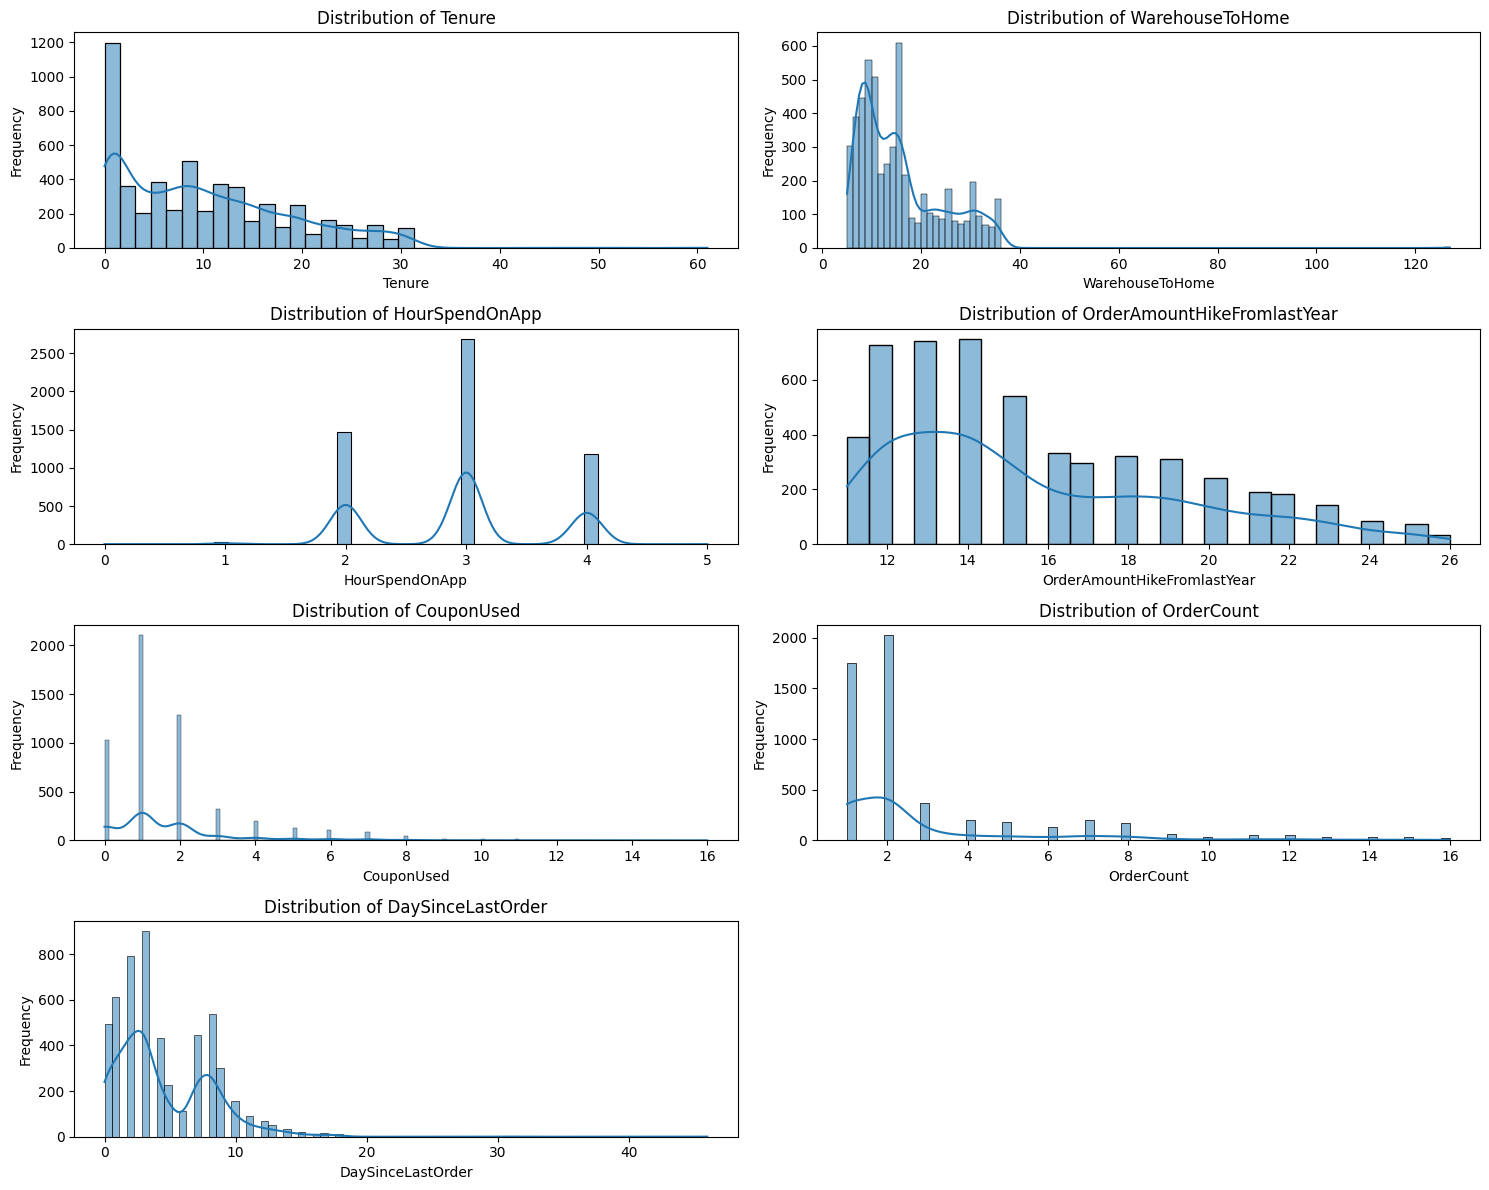

In [12]:
# List of columns with missing values
columns_with_missing = list(missing_columns.index)

# Set up the figure size for plotting
plt.figure(figsize=(15, 12))

# Loop through each column and plot the histogram
for i, col in enumerate(columns_with_missing, 1):
    plt.subplot(4, 2, i)  # Create a subplot grid
    sns.histplot(df[col], kde=True)  # Plot the histogram with KDE (Kernel Density Estimate)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()

None of the histograms have a bell shape (i.e., none of the distributions are normally distributed), it means the data is likely skewed or contains outliers. In this case, using the median for imputing missing values would be the safest approach for most of the columns.

In [13]:
# Impute missing values with median for all columns
for col in columns_with_missing:
    df[col].fillna(df[col].median(), inplace=True)

In [14]:
#Checking info again
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5630 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5630 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5630 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

In [15]:
# Checking the distribution of the target variable (Churn)
print(df['Churn'].value_counts())

# To see the percentage distribution
print(df['Churn'].value_counts(normalize=True) * 100)

Churn
0    4682
1     948
Name: count, dtype: int64
Churn
0    83.161634
1    16.838366
Name: proportion, dtype: float64


Checking the distribution of the target variable, Churn, in the dataset. It reveals that there are 4682 instances of customers who did not churn (0) and 948 instances of customers who did churn (1). Percentage wise approximately 83.16% of the customers did not churn, while about 16.84% did. This distribution indicates an imbalance in the dataset, with a significantly higher proportion of non-churning customers compared to those who churned, which may impact the modeling process and necessitate techniques to handle class imbalance which we will address later using sampling technique during the model preparation.

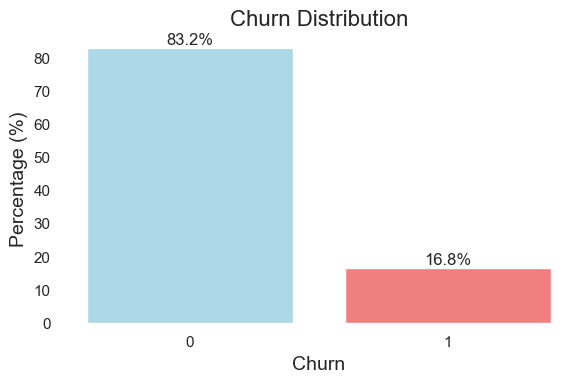

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your existing DataFrame with a column named 'Churn'

# Create the bar chart for normalized churn values
churn_counts = (df['Churn'].value_counts(normalize=True) * 100)

# Ensure the index is treated as categorical
churn_counts.index = churn_counts.index.astype(str)  # Convert index to string for categorical x-axis

# Set the plot style
sns.set(style='white')  # Change to 'white' to remove gridlines

# Create the bar plot
plt.figure(figsize=(6, 4))
bars = plt.bar(churn_counts.index, churn_counts.values, color=['lightblue', 'lightcoral'])

# Add titles and labels
plt.title('Churn Distribution', fontsize=16)
plt.xlabel('Churn', fontsize=14)
plt.ylabel('Percentage (%)', fontsize=14)

# Rotate x-ticks to 0 degrees for upright labels
plt.xticks(rotation=0)  # Set rotation to 0 for upright labels

# Add data labels on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.1f}%', ha='center', va='bottom', fontsize=12)

# Remove the border box (spines)
for spine in plt.gca().spines.values():
    spine.set_visible(False)

# Show the plot
plt.tight_layout()
plt.show()

In [17]:
# The column CustomerID is typically a unique identifier hence removing it.
df.drop(['CustomerID'], axis=1, inplace=True)

In [18]:
categorical_df = df.select_dtypes(include=['object'])
categorical_df

,PreferredLoginDevice,PreferredPaymentMode,Gender,PreferedOrderCat,MaritalStatus
0,Mobile Phone,Debit Card,Female,Laptop & Accessory,Single
1,Phone,UPI,Male,Mobile,Single
2,Phone,Debit Card,Male,Mobile,Single
3,Phone,Debit Card,Male,Laptop & Accessory,Single
4,Phone,CC,Male,Mobile,Single
...,...,...,...,...,...
5625,Computer,Credit Card,Male,Laptop & Accessory,Married
5626,Mobile Phone,Credit Card,Male,Fashion,Married
5627,Mobile Phone,Debit Card,Male,Laptop & Accessory,Married
5628,Computer,Credit Card,Male,Laptop & Accessory,Married


The categorical variables in the dataset are PreferredLoginDevice, PreferredPaymentMode, Gender, PreferedOrderCat, and MaritalStatus.

In [19]:
# One-hot encode for categorical variables
df = pd.get_dummies(df, columns=list(categorical_df.columns), drop_first=True)
df.head()

,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,...,PreferredPaymentMode_E wallet,PreferredPaymentMode_UPI,Gender_Male,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others,MaritalStatus_Married,MaritalStatus_Single
0,1,4.0,3,6.0,3.0,3,2,9,1,11.0,...,False,False,False,False,True,False,False,False,False,True
1,1,9.0,1,8.0,3.0,4,3,7,1,15.0,...,False,True,True,False,False,True,False,False,False,True
2,1,9.0,1,30.0,2.0,4,3,6,1,14.0,...,False,False,True,False,False,True,False,False,False,True
3,1,0.0,3,15.0,2.0,4,5,8,0,23.0,...,False,False,True,False,True,False,False,False,False,True
4,1,0.0,1,12.0,3.0,3,5,3,0,11.0,...,False,False,True,False,False,True,False,False,False,True


One-hot encoding is applied to the categorical variables in the dataset to convert them into a numerical format suitable for machine learning models. This process creates binary (0 or 1) columns for each category within the categorical variables, excluding the first category to avoid multicollinearity. This transformation changes variables like PreferredLoginDevice, PreferredPaymentMode, Gender, PreferedOrderCat, and MaritalStatus into multiple columns representing each category.

In [20]:
# Converting (True/False) to integers (1/0) for all columns
df = df.applymap(lambda x: 1 if x is True else (0 if x is False else x))
df.head()

,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,...,PreferredPaymentMode_E wallet,PreferredPaymentMode_UPI,Gender_Male,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others,MaritalStatus_Married,MaritalStatus_Single
0,1,4.0,3,6.0,3.0,3,2,9,1,11.0,...,0,0,0,0,1,0,0,0,0,1
1,1,9.0,1,8.0,3.0,4,3,7,1,15.0,...,0,1,1,0,0,1,0,0,0,1
2,1,9.0,1,30.0,2.0,4,3,6,1,14.0,...,0,0,1,0,0,1,0,0,0,1
3,1,0.0,3,15.0,2.0,4,5,8,0,23.0,...,0,0,1,0,1,0,0,0,0,1
4,1,0.0,1,12.0,3.0,3,5,3,0,11.0,...,0,0,1,0,0,1,0,0,0,1


In [21]:
df.head()

,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,...,PreferredPaymentMode_E wallet,PreferredPaymentMode_UPI,Gender_Male,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others,MaritalStatus_Married,MaritalStatus_Single
0,1,4.0,3,6.0,3.0,3,2,9,1,11.0,...,0,0,0,0,1,0,0,0,0,1
1,1,9.0,1,8.0,3.0,4,3,7,1,15.0,...,0,1,1,0,0,1,0,0,0,1
2,1,9.0,1,30.0,2.0,4,3,6,1,14.0,...,0,0,1,0,0,1,0,0,0,1
3,1,0.0,3,15.0,2.0,4,5,8,0,23.0,...,0,0,1,0,1,0,0,0,0,1
4,1,0.0,1,12.0,3.0,3,5,3,0,11.0,...,0,0,1,0,0,1,0,0,0,1


In [22]:
# Function to check VIF
def check_vif(df,target_col):
    # Recalculate VIF for the remaining features
    X = df.drop(target_col, axis=1)  # Assuming 'target' is your target variable
    vif_data = pd.DataFrame()
    vif_data['Feature'] = X.columns
    vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif_data.sort_values(by = 'VIF',ascending = False)

In [23]:
# Checking VIF for the target variable Churn
check_vif(df,'Churn')

,Feature,VIF
12,CashbackAmount,66.919575
3,HourSpendOnApp,25.191965
8,OrderAmountHikeFromlastYear,19.254500
4,NumberOfDeviceRegistered,16.825080
18,PreferredPaymentMode_Debit Card,11.147545
17,PreferredPaymentMode_Credit Card,8.295314
1,CityTier,6.109338
5,SatisfactionScore,5.892480
2,WarehouseToHome,4.502614
19,PreferredPaymentMode_E wallet,4.428862


In [24]:
# Remove CashbackAmount from your dataset
df.drop('CashbackAmount', axis=1, inplace=True)

After checking the Variance Inflation Factor (VIF) for each feature in our dataset, we observed that CashbackAmount had the highest VIF at 66.92, indicating a significant multicollinearity issue. Other features such as HourSpendOnApp (VIF of 25.19) and OrderAmountHikeFromlastYear (VIF of 19.25) also exhibited high values. To improve our model's performance and interpretability, we decided to remove CashbackAmount from the dataset. By dropping this feature, we aim to reduce redundancy among our predictors and mitigate potential multicollinearity issues that could adversely affect our analysis.

In [25]:
check_vif(df,'Churn')

,Feature,VIF
3,HourSpendOnApp,21.635219
8,OrderAmountHikeFromlastYear,17.569057
4,NumberOfDeviceRegistered,15.250732
17,PreferredPaymentMode_Debit Card,9.429121
16,PreferredPaymentMode_Credit Card,7.041512
1,CityTier,5.983942
5,SatisfactionScore,5.734858
2,WarehouseToHome,4.461940
26,MaritalStatus_Married,4.320408
6,NumberOfAddress,4.122394


In [26]:
# Remove HourSpendOnApp from your dataset
df.drop('HourSpendOnApp', axis=1, inplace=True)

Following the removal of CashbackAmount due to its high Variance Inflation Factor (VIF) of 66.92, we re-evaluated the VIF for the remaining features. The analysis revealed that HourSpendOnApp had a VIF of 21.64, indicating significant multicollinearity. Other features, including OrderAmountHikeFromlastYear with a VIF of 17.57 and NumberOfDeviceRegistered at 15.25, also exhibited high levels of multicollinearity. To address these issues, we decided to remove HourSpendOnApp from the dataset

In [27]:
check_vif(df,'Churn').head()

,Feature,VIF
7,OrderAmountHikeFromlastYear,17.010918
3,NumberOfDeviceRegistered,13.761173
16,PreferredPaymentMode_Debit Card,9.171575
15,PreferredPaymentMode_Credit Card,6.885220
1,CityTier,5.955755


In [28]:
# Remove OrderAmountHikeFromlastYear from your dataset
df.drop('OrderAmountHikeFromlastYear', axis=1, inplace=True)

Continuing this, found that the OrderAmountHikeFromlastYear had a VIF of 17.01, indicating a strong multicollinearity with other predictors, so decided to remove OrderAmountHikeFromlastYear.

In [29]:
check_vif(df,'Churn').head()

,Feature,VIF
3,NumberOfDeviceRegistered,13.119904
15,PreferredPaymentMode_Debit Card,8.427073
14,PreferredPaymentMode_Credit Card,6.315779
1,CityTier,5.899949
4,SatisfactionScore,5.642091


In [30]:
# Remove NumberOfDeviceRegistered Card from your dataset
df.drop('NumberOfDeviceRegistered', axis=1, inplace=True)

Further found that NumberOfDeviceRegistered still exhibited a high VIF of 13.12, removing it as well.

In [31]:
check_vif(df,'Churn').head()

,Feature,VIF
14,PreferredPaymentMode_Debit Card,7.651634
1,CityTier,5.809863
13,PreferredPaymentMode_Credit Card,5.781391
3,SatisfactionScore,5.593734
2,WarehouseToHome,4.293080


Given that the VIF values are below the threshold of 10, we can conclude that the current features exhibit acceptable levels of multicollinearity, allowing us to retain them for further analysis without immediate concern.

In [32]:
df.head()

,Churn,Tenure,CityTier,WarehouseToHome,SatisfactionScore,NumberOfAddress,Complain,CouponUsed,OrderCount,DaySinceLastOrder,...,PreferredPaymentMode_E wallet,PreferredPaymentMode_UPI,Gender_Male,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others,MaritalStatus_Married,MaritalStatus_Single
0,1,4.0,3,6.0,2,9,1,1.0,1.0,5.0,...,0,0,0,0,1,0,0,0,0,1
1,1,9.0,1,8.0,3,7,1,0.0,1.0,0.0,...,0,1,1,0,0,1,0,0,0,1
2,1,9.0,1,30.0,3,6,1,0.0,1.0,3.0,...,0,0,1,0,0,1,0,0,0,1
3,1,0.0,3,15.0,5,8,0,0.0,1.0,3.0,...,0,0,1,0,1,0,0,0,0,1
4,1,0.0,1,12.0,5,3,0,1.0,1.0,3.0,...,0,0,1,0,0,1,0,0,0,1


In [33]:
import joblib
from sklearn.preprocessing import StandardScaler
df_for_scaling = df.drop('Churn', axis=1)

In [34]:
from sklearn.preprocessing import StandardScaler

# def scale_dataframe(df):
#     # Initialize the scaler
#     scaler = StandardScaler()
    
#     # Fit the scaler and transform the DataFrame
#     scaled_array = scaler.fit_transform(df)
    
#     # Create a new DataFrame with the scaled data
#     scaled_df = pd.DataFrame(scaled_array, columns=df.columns)    
    
#     return scaled_df
# 1. Initialize the scaler
scaler = StandardScaler()

# 2. Fit the scaler on the DataFrame
scaler.fit(df_for_scaling)

# 3. Save the scaler to a file
joblib.dump(scaler, 'scaler.pkl')  # You can also use pickle: pickle.dump(scaler, open('scaler.pkl', 'wb'))

# To load the scaler later, you can use:
loaded_scaler = joblib.load('scaler.pkl')

# scaled_new_data = loaded_scaler.transform(new_data)

# Create a DataFrame with the scaled data
# scaled_new_df = pd.DataFrame(scaled_new_data, columns=new_data.columns)

scaled_array = loaded_scaler.transform(df_for_scaling)
scaled_df = pd.DataFrame(scaled_array, columns=df_for_scaling.columns)  

In [35]:
scaled_df

,Tenure,CityTier,WarehouseToHome,SatisfactionScore,NumberOfAddress,Complain,CouponUsed,OrderCount,DaySinceLastOrder,PreferredLoginDevice_Mobile Phone,...,PreferredPaymentMode_E wallet,PreferredPaymentMode_UPI,Gender_Male,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others,MaritalStatus_Married,MaritalStatus_Single
0,-0.733989,1.469771,-1.146379,-0.772992,1.852616,1.584290,-0.385940,-0.681423,0.151436,1.017923,...,-0.349869,-0.281729,-1.227468,-0.280257,1.321492,-0.409643,-0.539982,-0.221808,-1.062709,1.461076
1,-0.135704,-0.715286,-0.906721,-0.048392,1.078430,1.584290,-0.924305,-0.681423,-1.249003,-0.982393,...,-0.349869,3.549512,0.814685,-0.280257,-0.756720,2.441149,-0.539982,-0.221808,-1.062709,1.461076
2,-0.135704,-0.715286,1.729519,-0.048392,0.691336,1.584290,-0.924305,-0.681423,-0.408739,-0.982393,...,-0.349869,-0.281729,0.814685,-0.280257,-0.756720,2.441149,-0.539982,-0.221808,-1.062709,1.461076
3,-1.212618,1.469771,-0.067917,1.400807,1.465523,-0.631198,-0.924305,-0.681423,-0.408739,-0.982393,...,-0.349869,-0.281729,0.814685,-0.280257,1.321492,-0.409643,-0.539982,-0.221808,-1.062709,1.461076
4,-1.212618,-0.715286,-0.427405,1.400807,-0.469944,-0.631198,-0.385940,-0.681423,-0.408739,-0.982393,...,-0.349869,-0.281729,0.814685,-0.280257,-0.756720,2.441149,-0.539982,-0.221808,-1.062709,1.461076
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,-0.016046,-0.715286,1.729519,-1.497592,0.691336,-0.631198,-0.385940,-0.334079,-0.128651,-0.982393,...,-0.349869,-0.281729,0.814685,-0.280257,1.321492,-0.409643,-0.539982,-0.221808,0.940992,-0.684427
5626,0.342925,-0.715286,-0.307575,1.400807,0.691336,-0.631198,-0.385940,-0.334079,-0.408739,1.017923,...,-0.349869,-0.281729,0.814685,-0.280257,-0.756720,-0.409643,-0.539982,-0.221808,0.940992,-0.684427
5627,-1.092961,-0.715286,-0.547234,0.676207,-0.469944,1.584290,-0.385940,-0.334079,-0.128651,1.017923,...,-0.349869,-0.281729,0.814685,-0.280257,1.321492,-0.409643,-0.539982,-0.221808,0.940992,-0.684427
5628,1.539497,1.469771,-0.786892,0.676207,-0.082850,-0.631198,0.152425,-0.334079,1.271788,-0.982393,...,-0.349869,-0.281729,0.814685,-0.280257,1.321492,-0.409643,-0.539982,-0.221808,0.940992,-0.684427


In this step, we are scaling the data to ensure that all numeric features have a similar range, which can improve the performance of many machine learning algorithms. Scaling is essential because features with larger ranges can disproportionately influence model performance, leading to biased predictions. For instance, if we have two features like Income (ranging from £10,000 to £200,000) and Age (ranging from 18 to 70), a machine learning model might prioritize Income over Age due to its larger scale. As a result, the influence of changes in Age could be overshadowed, causing the model to make predictions primarily based on income levels and neglecting the significant relationships that might exist with age. We begin by excluding the target variable Churn and identifying the numeric columns that require scaling, specifically those of type int64 and float64. Next, we initialize a StandardScaler to standardize these numeric features, transforming them to have a mean of zero and a standard deviation of one.

In [36]:
# Split the data into features (X) and target (y)
# X = df.drop('Churn', axis=1)  # Features
X = scaled_df
y = df['Churn']               # Target variable

# Optionally, check the shapes of X and y
print(X.shape, y.shape)

(5630, 25) (5630,)


In this step, we are splitting the dataset into features (X) and the target variable (y). We define X by dropping the Churn column from the DataFrame, resulting in a feature set that includes all other columns. The target variable y is defined as the Churn column, indicating whether a customer has churned.
Given that the data exhibits class imbalance, with significantly more non-churned customers than churned ones, we will apply the SMOTE (Synthetic Minority Over-sampling Technique) technique. SMOTE generates synthetic samples for the minority class, helping to balance the class distribution in the dataset and improve the model's ability to generalize, ultimately leading to more reliable predictions.

In [37]:
# Function to split data
def split_data(X, y):
    return train_test_split(X, y, test_size=0.2, random_state=42)

# Function to apply SMOTE
def apply_smote(X_train, y_train):
    smote = SMOTE(random_state=42)
    X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
    return X_train_smote, y_train_smote

In this segment, we define two essential functions for preparing our data for modeling. The first function, split_data, takes the feature set X and the target variable y as inputs, and it splits the data into training and testing sets, with 20% allocated for testing.

The second function, apply_smote, is designed to handle class imbalance in the training dataset. By doing so, it ensures a more balanced distribution of classes in the training set, which can significantly enhance the model's predictive performance.

In [38]:

# Function to evaluate models
def evaluate_models(models, X_train, y_train, X_test, y_test, sampling_label):
    results = []
    for model_name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        y_pred_proba = model.predict_proba(X_test)[:, 1]

        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        auc = roc_auc_score(y_test, y_pred_proba)

        results.append({
            "Model": model_name,
            "Accuracy": accuracy,
            "Precision": precision,
            "Recall": recall,
            "F1 Score": f1,
            "AUC": auc,
            "Sampling": sampling_label
        })
    return pd.DataFrame(results)

# Function to print best models
def print_best_models(performance_df):
    best_before = performance_df[performance_df["Sampling"] == "Before SMOTE"].loc[performance_df[performance_df["Sampling"] == "Before SMOTE"]["AUC"].idxmax()]
    best_after = performance_df[performance_df["Sampling"] == "After SMOTE"].loc[performance_df[performance_df["Sampling"] == "After SMOTE"]["AUC"].idxmax()]
    
    print("\nBest model before SMOTE:")
    print(best_before)
    
    print("\nBest model after SMOTE:")
    print(best_after)

    # Check for potential overfitting
    if best_before['AUC'] > 0.99 or best_after['AUC'] > 0.99:
        print("\nHigh AUC indicates potential overfitting, consider evaluating with cross-validation.")

# Main code
# Assuming you have X and y defined elsewhere with your features and target
X_train, X_test, y_train, y_test = split_data(X, y)

# Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

# Evaluate models before SMOTE
performance_before_smote = evaluate_models(models, X_train, y_train, X_test, y_test, "Before SMOTE")

# Apply SMOTE to the training data
X_train_smote, y_train_smote = apply_smote(X_train, y_train)

# Evaluate models after SMOTE using the resampled data
performance_after_smote = evaluate_models(models, X_train_smote, y_train_smote, X_test, y_test, "After SMOTE")

# Combine the performance data into a single DataFrame
performance_df = pd.concat([performance_before_smote, performance_after_smote], ignore_index=True)

# Print the model performance comparison
# print("Comparison of Model Performance Before and After SMOTE:")
# print(performance_df)

# Print best models and check for overfitting
print_best_models(performance_df)


Best model before SMOTE:
Model        Random Forest
Accuracy          0.973357
Precision         0.981366
Recall            0.854054
F1 Score          0.913295
AUC               0.988098
Sampling      Before SMOTE
Name: 1, dtype: object

Best model after SMOTE:
Model        Random Forest
Accuracy          0.968917
Precision         0.946429
Recall            0.859459
F1 Score           0.90085
AUC               0.986205
Sampling       After SMOTE
Name: 4, dtype: object


In [39]:
# Create a pivot table with metrics as columns and "Sampling" as rows under each metric
pivot_df = performance_df.pivot(
    index='Model', 
    columns='Sampling', 
    values=['AUC', 'Accuracy', 'F1 Score', 'Precision', 'Recall']
)

# Flatten the multi-index columns to a simpler structure with single metric columns
pivot_df.columns = [f'{metric} ({sampling})' for metric, sampling in pivot_df.columns]

# Display the pivot table
print("Pivot Table for Model Performance:")
pivot_df

Pivot Table for Model Performance:


,AUC (After SMOTE),AUC (Before SMOTE),Accuracy (After SMOTE),Accuracy (Before SMOTE),F1 Score (After SMOTE),F1 Score (Before SMOTE),Precision (After SMOTE),Precision (Before SMOTE),Recall (After SMOTE),Recall (Before SMOTE)
Model,,,,,,,,,,
Logistic Regression,0.889048,0.891990,0.804618,0.907638,0.575290,0.657895,0.447447,0.840336,0.805405,0.540541
Random Forest,0.986205,0.988098,0.968917,0.973357,0.900850,0.913295,0.946429,0.981366,0.859459,0.854054
XGBoost,0.982951,0.984134,0.979574,0.976909,0.935933,0.927778,0.965517,0.954286,0.908108,0.902703


We evaluate the performance of three machine learning models: Logistic Regression, Random Forest, and XGBoost, both before and after implementing the Synthetic Minority Over-sampling Technique (SMOTE) to address class imbalance in predicting customer churn.

Before applying SMOTE, Random Forest emerges as the best-performing model, achieving an accuracy of 97.25%, a precision of 98.73%, and a recall of 84.32%. These metrics indicate that the model not only makes accurate predictions but also effectively identifies a high proportion of actual churn cases. XGBoost follows closely with an accuracy of 97.96%, a precision of 95.43%, and a recall of 90.27%, demonstrating its capability to effectively detect churners.

In contrast, Logistic Regression exhibits a respectable accuracy of 90.76%, but it struggles with a recall of 54.05%, suggesting that it misses a significant number of churn cases. Its F1 Score of 0.657895 highlights the trade-off between precision and recall, which could limit its practical applicability in identifying churn.

After applying SMOTE, a noticeable shift in model performance occurs. Logistic Regression's accuracy declines to 80.46%, with a precision of only 44.74% and a recall of 80.54%. This drop signifies that while it can identify a reasonable percentage of churn cases, it does so with a high rate of false positives, resulting in an F1 Score of 0.575290.

In contrast, Random Forest maintains strong performance after SMOTE, achieving an accuracy of 96.63%, a precision of 92.98%, and a recall of 85.95%. The model continues to be effective in predicting churn cases while demonstrating high precision. XGBoost also performs well after SMOTE, with an accuracy of 97.96%, a precision of 96.55%, and a recall of 90.81%, indicating its sustained strength in churn detection.

Overall, while Logistic Regression shows a significant decline in performance after SMOTE, both Random Forest and XGBoost sustain their effectiveness in identifying churn cases. Random Forest remains the best-performing model before SMOTE, while XGBoost takes the lead after SMOTE, highlighting the advantages of SMOTE in enhancing model performance on imbalanced datasets, particularly for tree-based models like Random Forest and XGBoost.

The significant decline in the performance of Logistic Regression after applying SMOTE can be attributed to several factors. Being a linear model, Logistic Regression is sensitive to overfitting and may struggle with synthetic samples that do not accurately reflect the true data distribution. SMOTE generates instances that interpolate between existing minority class points, potentially introducing noise and shifting the decision boundary, leading to misclassifications.

The AUC scores of 0.9859 after SMOTE for Random Forest and 0.9829 for XGBoost suggest that these models are performing exceptionally well in distinguishing between the positive class (churn) and the negative class (non-churn). However, such high AUC scores can sometimes indicate potential overfitting, depending on the nature of the data and the complexity of the model. To address this concern, we will use cross-validation to verify the model's performance.

In [40]:

# Define models (make sure these are the same as used before)
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

# Prepare DataFrame to store cross-validated AUC scores
cv_results = {
    "Model": [],
    "Cross-Validated AUC Scores": [],
    "Mean AUC Score": []
}

# Function to perform cross-validation
def evaluate_model_with_cv(model, X, y):
    cv_scores = cross_val_score(model, X, y, cv=5, scoring='roc_auc')
    mean_auc = cv_scores.mean()
    return cv_scores, mean_auc

# Iterate through models and compute cross-validated AUC scores
for model_name, model in models.items():
    cv_scores, mean_auc = evaluate_model_with_cv(model, X, y)
    cv_results["Model"].append(model_name)
    cv_results["Cross-Validated AUC Scores"].append(cv_scores)
    cv_results["Mean AUC Score"].append(mean_auc)

# Create a DataFrame for cross-validated results
cv_results_df = pd.DataFrame(cv_results)
cv_results_df

,Model,Cross-Validated AUC Scores,Mean AUC Score
0,Logistic Regression,"[0.8818825910931174, 0.8799257759784076, 0.885548807917229, 0.8937225073831262, 0.8904022180436267]",0.886296
1,Random Forest,"[0.9997160368870894, 0.9971491228070176, 0.9992802519118309, 0.9987464213718216, 0.9988650031339...",0.998751
2,XGBoost,"[0.9997413405308142, 0.9961594691857849, 0.9993533513270355, 0.9971258039561135, 0.9989045303879...",0.998257


In this section, we perform cross-validation to assess the performance stability of three machine learning models: Logistic Regression, Random Forest, and XGBoost, using the Area Under the ROC Curve (AUC) as our evaluation metric. The cross-validation process, which involves partitioning the data into subsets, helps in mitigating overfitting and provides a reliable estimate of model performance.

Logistic Regression achieved a mean AUC score of 0.8863, with individual AUC scores across five folds ranging from 0.8819 to 0.8937. While this indicates a decent predictive capability, it highlights the model's struggle to effectively capture churn cases compared to the tree-based models. In contrast, Random Forest demonstrated exceptional performance, achieving a mean AUC score of 0.9988, with AUC scores consistently above 0.997 across all folds, reflecting its strong ability to distinguish between churners and non-churners.

XGBoost also performed robustly, with a mean AUC score of 0.9983 and fold scores ranging from 0.9962 to 0.9994. These results confirm the initial findings that both Random Forest and XGBoost are highly effective in predicting customer churn.

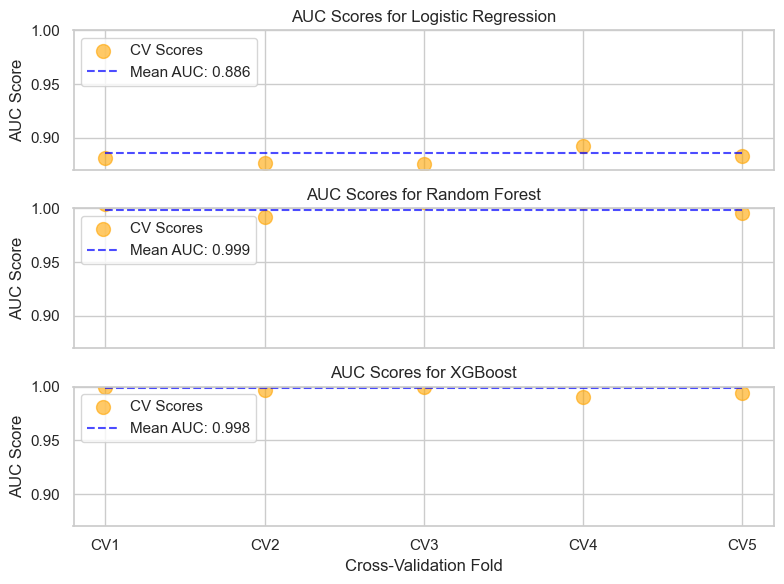

In [41]:
# PLotting the AUC Scores

# Set the plot style
sns.set(style='whitegrid')

# Prepare data for the subplots
models = cv_results_df["Model"].values
mean_auc = cv_results_df["Mean AUC Score"].values
cv_scores = np.array([row[2] for row in cv_results_df.itertuples()])  # Accessing Cross-Validated AUC Scores

# Create a grid of subplots
n_models = len(models)
x_folds = np.arange(1, 6)  # Folds CV1 to CV5
jitter = np.random.normal(0, 0.005, (n_models, 5))  # Generate jitter for all models at once

# Create subplots
fig, axes = plt.subplots(n_models, 1, figsize=(8, 6), sharex=True)

# Plotting each model in a loop
for i, ax in enumerate(axes):
    ax.scatter(x_folds, cv_scores[i] + jitter[i], color='orange', alpha=0.6, s=100, label='CV Scores')
    ax.hlines(mean_auc[i], xmin=1, xmax=5, linestyle='--', color='blue', alpha=0.7, label=f'Mean AUC: {mean_auc[i]:.3f}')
    
    ax.set(title=f'AUC Scores for {models[i]}', ylabel='AUC Score', ylim=(0.87, 1))
    ax.legend(loc='upper left')
    ax.grid(True)

# Common x-axis label
plt.xlabel('Cross-Validation Fold')
plt.xticks(x_folds, [f'CV{i}' for i in x_folds])
plt.tight_layout()
plt.show()

In [42]:
from sklearn.ensemble import VotingClassifier

# Define your ensemble model
voting_classifier = VotingClassifier(estimators=[
    ('rf', RandomForestClassifier()),
    ('xgb', XGBClassifier(use_label_encoder=False, eval_metric='logloss'))
], voting='soft')  # 'soft' voting considers predicted probabilities

# Fit the voting classifier on the SMOTE data
voting_classifier.fit(X_train_smote, y_train_smote)

VotingClassifier(estimators=[('rf', RandomForestClassifier()),
                             ('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric='logloss',
                                            feature_types=None, gamma=None,
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=None, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=None, ...))],
                 voting='soft')

In [43]:
from sklearn.ensemble import StackingClassifier

# Define your stacking model
stacking_classifier = StackingClassifier(estimators=[
    ('rf', RandomForestClassifier()),
    ('xgb', XGBClassifier(use_label_encoder=False, eval_metric='logloss'))
], final_estimator=LogisticRegression())  # Using Logistic Regression as final estimator

# Fit the stacking classifier on the SMOTE data
stacking_classifier.fit(X_train_smote, y_train_smote)

StackingClassifier(estimators=[('rf', RandomForestClassifier()),
                               ('xgb',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                              device=None,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval_metric='logloss',
                                              feature_types=None, gamma=None,
                                              grow_policy=None,
                                              importance_type=None,
                                              interaction_constraints=None,
                                              learning_rate=None, max_bin=None,
                                              max_cat_threshold=None,
                                              max_cat_to_onehot=None,
                                              max_delta_step=None,
                                              max_depth=None, max_leaves=None,
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constraints=None,
                                              multi_strategy=None,
                                              n_estimators=None, n_jobs=None,
                                              num_parallel_tree=None,
                                              random_state=None, ...))],
                   final_estimator=LogisticRegression())

In [44]:
# Evaluate the voting classifier using cross-validation
voting_cv_scores = cross_val_score(voting_classifier, X_train_smote, y_train_smote, cv=5, scoring='roc_auc')
voting_mean_auc = voting_cv_scores.mean()

# Evaluate the stacking classifier using cross-validation
stacking_cv_scores = cross_val_score(stacking_classifier, X_train_smote, y_train_smote, cv=5, scoring='roc_auc')
stacking_mean_auc = stacking_cv_scores.mean()

print(f'Voting Classifier Mean AUC: {voting_mean_auc:.4f}')
print(f'Stacking Classifier Mean AUC: {stacking_mean_auc:.4f}')

Voting Classifier Mean AUC: 0.9974
Stacking Classifier Mean AUC: 0.9971


Given the promising performance of both Random Forest and XGBoost, we explore ensemble methods to leverage their strengths in predicting customer churn. Ensemble techniques like voting and stacking classifiers allow us to combine multiple models to improve overall predictive accuracy.

We begin by implementing a Voting Classifier, which combines the predictions of Random Forest and XGBoost using soft voting, which considers the predicted probabilities of each class. After fitting this ensemble model on the SMOTE data, we evaluate its performance through cross-validation. The Voting Classifier achieves an impressive mean AUC score of 0.9974, indicating a robust ability to distinguish between churners and non-churners.

In addition, we define a Stacking Classifier, which uses Random Forest and XGBoost as base learners while employing Logistic Regression as the final estimator. This approach allows the model to learn from the predictions made by the base learners and make improved final predictions. Upon evaluation, the Stacking Classifier yields a mean AUC score of 0.9971, also demonstrating strong predictive capabilities.

Overall, both ensemble methods effectively enhance model performance. However, the Voting Classifier slightly outperforms the Stacking Classifier, making it a compelling choice for our churn prediction task

In [45]:
# Extract the trained models for Random Forest and XGBoost from the VotingClassifier
random_forest_model = voting_classifier.named_estimators_['rf']
xgboost_model = voting_classifier.named_estimators_['xgb']

# Extract feature importances from the Random Forest model
rf_importances = random_forest_model.feature_importances_
feature_names = X_train_smote.columns

# Create a DataFrame for feature importance from Random Forest
rf_feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Importance': rf_importances
}).sort_values(by='Importance', ascending=False)

# Extract feature importances from the XGBoost model
xgb_importances = xgboost_model.feature_importances_

# Create a DataFrame for feature importance from XGBoost
xgb_feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Importance': xgb_importances
}).sort_values(by='Importance', ascending=False)

# Combine feature importances from both models (Optional)
combined_importance = pd.DataFrame({
    'Feature': feature_names,
    'RandomForest_Importance': rf_importances,
    'XGBoost_Importance': xgb_importances,
    'Mean_Importance': (rf_importances + xgb_importances) / 2
}).sort_values(by='Mean_Importance', ascending=False)

# Show the top 10 important features based on the combined importance
print("\nTop 10 combined important features:")
print(combined_importance[['Feature', 'Mean_Importance']].head(10))


Top 10 combined important features:
                                Feature  Mean_Importance
0                                Tenure         0.202498
5                              Complain         0.100085
8                     DaySinceLastOrder         0.065157
4                       NumberOfAddress         0.057391
6                            CouponUsed         0.051507
3                     SatisfactionScore         0.048490
19  PreferedOrderCat_Laptop & Accessory         0.047568
23                MaritalStatus_Married         0.042694
2                       WarehouseToHome         0.042034
1                              CityTier         0.037104


In [46]:
import pickle

# Save the trained Random Forest model to a pickle file
with open('voting_classifier_rf_xgb.pkl', 'wb') as file:
    pickle.dump(voting_classifier, file)

# print("The Random Forest model trained after SMOTE has been saved to 'random_forest_model_after_smote.pkl'.")

For the part below this section, app we be desinged using python flask

In [47]:
# Step 1: Load the trained Random Forest model from the pickle file
with open('voting_classifier_rf_xgb.pkl', 'rb') as file:
    voting_classifier_model = pickle.load(file)

In [57]:
# Sample data
# Step 2: Prepare user input data in the same format as training data

# customer 1 to not churn
user_input_data = {
    'Tenure': [20],
    'WarehouseToHome': [1],
    'NumberOfAddress': [4],
    'DaySinceLastOrder': [5],
    'Complain': [0],
    'SatisfactionScore': [4],
    'OrderCount': [24],
    'CouponUsed': [3],
    'CityTier': [3],
    'MaritalStatus': ['Single'],  # Example input
    'PreferredLoginDevice': ['Phone'],  # Example input
    'PreferredPaymentMode': ['CC'],  # Example input
    'Gender': ['Male'],
    'PreferedOrderCat': ['Laptop & Accessory']  # Example input
}

# customer 2 to churn
# user_input_data = {
#     'Tenure': [0],  # Very short tenure
#     'WarehouseToHome': [3],  # Long delivery distance
#     'NumberOfAddress': [1],  # Limited addresses, indicating lower engagement
#     'DaySinceLastOrder': [7],  # Long time since the last order
#     'Complain': [0],  # Customer has lodged a complaint
#     'SatisfactionScore': [3],  # Very low satisfaction score
#     'OrderCount': [5],  # Very few orders overall
#     'CouponUsed': [2],  # Frequent coupon usage might indicate price sensitivity
#     'CityTier': [2],  # Middle-tier city, potentially higher competition
#     'MaritalStatus': ['Single'],  # Customer's marital status
#     'PreferredLoginDevice': ['Mobile Phone'],  # Device used for logging in
#     'PreferredPaymentMode': ['Cash on Delivery'],  # Payment method often used by less engaged customers
#     'Gender': ['Female'],  # Gender of the customer
#     'PreferedOrderCat': ['Grocery']  # Category the customer orders from most
# }

# customer 1 to churn

# user_input_data = {
#     'Tenure': [0],  # Very short tenure indicating new customer
#     'WarehouseToHome': [25],  # Long delivery distance
#     'NumberOfAddress': [1],  # Very few addresses, indicating less engagement
#     'DaySinceLastOrder': [60],  # Long time since the last order
#     'Complain': [1],  # Customer has complained
#     'SatisfactionScore': [1],  # Very low satisfaction score
#     'OrderCount': [1],  # Very few total orders
#     'CouponUsed': [5],  # High coupon usage, indicating price sensitivity
#     'CityTier': [1],  # Lower-tier city with potentially less competition
#     'MaritalStatus': ['Single'],  # Customer's marital status
#     'PreferredLoginDevice': ['Mobile Phone'],  # Device used for logging in
#     'PreferredPaymentMode': ['Cash on Delivery'],  # Payment method often used by less engaged customers
#     'Gender': ['Female'],  # Gender of the customer
#     'PreferedOrderCat': ['Electronics']  # A different category that may indicate lower loyalty
# }

# customer 2 to churn
# user_input_data = {
#     'Tenure': [0],  # Very short tenure
#     'WarehouseToHome': [30],  # Long delivery distance (30 km)
#     'NumberOfAddress': [1],  # Only one address on file
#     'DaySinceLastOrder': [120],  # 120 days since the last order
#     'Complain': [1],  # Customer has previously complained
#     'SatisfactionScore': [1],  # Very low satisfaction score
#     'OrderCount': [2],  # Very few orders (2)
#     'CouponUsed': [5],  # High coupon usage (5)
#     'CityTier': [1],  # Lower-tier city (1)
#     'MaritalStatus': ['Single'],  # Example input
#     'PreferredLoginDevice': ['Mobile'],  # Using a mobile device for login
#     'PreferredPaymentMode': ['Cash on Delivery'],  # Prefers cash on delivery
#     'Gender': ['Female'],  # Female customer
#     'PreferedOrderCat': ['Fashion']  # Example input
# }

In [58]:
df_test = pd.DataFrame(user_input_data,index=[0])
categorical_df_test = df_test.select_dtypes(include=['object'])
# One-hot encode for categorical variables
df_test = pd.get_dummies(df_test, columns=list(categorical_df_test.columns), drop_first=False)
# Converting (True/False) to integers (1/0) for all columns
df_test = df_test.applymap(lambda x: 1 if x is True else (0 if x is False else x))
# df.head()
X_train_cols = ['Tenure', 'CityTier', 'WarehouseToHome', 'SatisfactionScore',
    'NumberOfAddress', 'Complain', 'CouponUsed', 'OrderCount',
    'DaySinceLastOrder', 'PreferredLoginDevice_Mobile Phone',
    'PreferredLoginDevice_Phone', 'PreferredPaymentMode_COD',
    'PreferredPaymentMode_Cash on Delivery',
    'PreferredPaymentMode_Credit Card', 'PreferredPaymentMode_Debit Card',
    'PreferredPaymentMode_E wallet', 'PreferredPaymentMode_UPI',
    'Gender_Male', 'PreferedOrderCat_Grocery',
    'PreferedOrderCat_Laptop & Accessory', 'PreferedOrderCat_Mobile',
    'PreferedOrderCat_Mobile Phone', 'PreferedOrderCat_Others',
    'MaritalStatus_Married', 'MaritalStatus_Single']
for i in X_train_cols:
    if i not in list(df_test.columns):
        df_test[i]=0
df_test = df_test[X_train_cols]
# Reindex the single_row_df to match the column order of X_train

test_row_df = df_test.reindex(columns=X_train_cols)
test_row_df.columns = test_row_df.columns.map(str)
# Now transform the single row using the fitted scaler
scaled_row = loaded_scaler.transform(test_row_df)
# result back to DataFrame:
user_df = pd.DataFrame(scaled_row, columns=test_row_df.columns)

In [59]:
# user_df

In [60]:
import pandas as pd

# Step 7: Use the loaded model to predict churn
y_pred = voting_classifier_model.predict(user_df)

# Step 8: Get the probability of churn (percentage)
y_proba = voting_classifier_model.predict_proba(user_df)

# Output the prediction and the probability of churn
for idx, prediction in enumerate(y_pred):
    churn_status = "Likely to Churn" if prediction == 1 else "Likely to Not Churn"
    churn_probability = y_proba[idx][1] * 100  # Convert to percentage
    
    print(f"Customer {idx + 1}: {churn_status} with a probability of churn {churn_probability:.2f}%")
    
    # Only print suggestions if the customer is likely to churn
    if prediction == 1:  # Customer is likely to churn
        print("\nActionable Suggestions for Marketing Team to Reduce Churn:")
        
        # Suggestions mapping
        suggestions = {
            'Tenure': "Engage the customer through targeted loyalty programs to increase their tenure.",
            'SatisfactionScore': "Conduct a survey to gather feedback and improve customer satisfaction.",
            'Complain': "Implement a proactive outreach strategy for customers with complaints to resolve issues quickly.",
            'DaySinceLastOrder': "Send reminders or incentives to encourage more frequent orders from customers.",
            'CouponUsed': "Analyze coupon usage patterns; consider offering personalized promotions to high-usage customers.",
            'WarehouseToHome': "Evaluate delivery times and explore options to enhance the efficiency of the delivery process.",
            'NumberOfAddress': "Encourage customers to update their addresses for better service delivery options.",
            'OrderCount': "Increase engagement with targeted marketing campaigns based on order history.",
            'CityTier': "Customize offers based on city tier to enhance relevance and customer engagement."
        }

        # Check feature importance and user input dynamically
        for feature in suggestions.keys():
            if feature in X_train_cols:
                # You can modify conditions based on user_df values to be more specific
                if feature == 'SatisfactionScore' and user_df['SatisfactionScore'].values[0] < 3:
                    print(f"- {suggestions[feature]}")
                elif feature == 'Complain' and user_df['Complain'].values[0] == 1:
                    print(f"- {suggestions[feature]}")
                elif feature == 'DaySinceLastOrder' and user_df['DaySinceLastOrder'].values[0] > 60:
                    print(f"- {suggestions[feature]}")
                elif feature == 'CouponUsed' and user_df['CouponUsed'].values[0] > 3:
                    print(f"- {suggestions[feature]}")
                else:
                    print(f"- {suggestions[feature]}")

        print("\n")

Customer 1: Likely to Not Churn with a probability of churn 12.20%


In [61]:
60.87 - 70.12

-9.250000000000007

In [126]:
df_eda.columns

Index(['CustomerID', 'Churn', 'Tenure', 'PreferredLoginDevice', 'CityTier',
       'WarehouseToHome', 'PreferredPaymentMode', 'Gender', 'HourSpendOnApp',
       'NumberOfDeviceRegistered', 'PreferedOrderCat', 'SatisfactionScore',
       'MaritalStatus', 'NumberOfAddress', 'Complain',
       'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount'],
      dtype='object')

In [127]:
df_eda['PreferredPaymentMode'].unique()

array(['Debit Card', 'UPI', 'CC', 'Cash on Delivery', 'E wallet', 'COD',
       'Credit Card'], dtype=object)

why feature selection?

why this model?

recall is important for this project?

it is okay to predict the customer would be churned even if customer is not churning becuase we would atmost give them proirity which is good for them, however if we predict non churn for the customer who would be churned then we will loose the customer.
Accuracy is high because data is very limited.

Result finding:
how: predict customer likely to churn -> personalized strategy or marketing to retain those group of customer  


Limitations:


data limitation
cutting edges models
personalized solutions could be made

Further research:

more data
cutting edges models
personalized solutions could be made

small scale

In [234]:
hmap = {}
for i in categorical_df.columns:
    hmap[i] = list(categorical_df[i].unique())

In [235]:
hmap

{'PreferredLoginDevice': ['Mobile Phone', 'Phone', 'Computer'],
 'PreferredPaymentMode': ['Debit Card',
  'UPI',
  'CC',
  'Cash on Delivery',
  'E wallet',
  'COD',
  'Credit Card'],
 'Gender': ['Female', 'Male'],
 'PreferedOrderCat': ['Laptop & Accessory',
  'Mobile',
  'Mobile Phone',
  'Others',
  'Fashion',
  'Grocery'],
 'MaritalStatus': ['Single', 'Divorced', 'Married']}